### Prototype of integrating TVB with SIIBRA - Download a structural connectivity from SIIBRA and setup a TVB simulation with it
#### (This is an adaptation of https://github.com/dickscheid/siibra-tutorials/blob/main/06-SIIBRA-TVB.ipynb, which used an older version of siibra-python)

### Imports and setup

In [26]:
import os
import numpy as np
import siibra
from tvb.simulator.lab import *

In [28]:
# Add an EBRAINS token
os.environ['HBP_AUTH_TOKEN'] = ''

### Get connectivity matrices

In [29]:
# get desired brain parcellation
atlas = siibra.atlases["human"]
jubrain = atlas.get_parcellation("julich 2.9")

In [30]:
# get connectivity weights
# this gives us a list of StreamlineCounts objects, so we'll arbitrarily choose one
conn_weights = siibra.get_features(jubrain, siibra.modalities.StreamlineCounts)
print(f'There are {len(conn_weights)} StreamlineCounts objects in {jubrain.name}')
conn_weights = conn_weights[0]
# get the weights matrix of StreamlineCounts object
weights_matrix = conn_weights.matrix
weights_matrix

There are 201 StreamlineCounts objects in Julich-Brain Cytoarchitectonic Maps 2.9


,Area 45 (IFG) left,Area 44 (IFG) left,Area Fo1 (OFC) left,Area Fo2 (OFC) left,Area Fo3 (OFC) left,Area hOc5 (LOC) left,"Area hOc2 (V2, 18) left","Area hOc1 (V1, 17, CalcS) left",Area hOc4v (LingG) left,Area hOc3v (LingG) left,...,Area Ia2 (Insula) right,Area Id8 (Insula) right,Area Id10 (Insula) right,BST (Bed Nucleus) right,Frontal-I (GapMap) right,Frontal-II (GapMap) right,Temporal-to-Parietal (GapMap) right,Frontal-to-Occipital (GapMap) right,Frontal-to-Temporal-I (GapMap) right,Frontal-to-Temporal-II (GapMap) right
Area 45 (IFG) left,8500,4318,2,2,47,5,5,14,3,14,...,0,5,1,1,1371,93,35,156,5,4
Area 44 (IFG) left,4318,22447,2,2,22,3,2,3,2,9,...,0,1,1,2,221,613,82,202,0,3
Area Fo1 (OFC) left,2,2,2636,4701,1902,7,18,48,8,51,...,1,1,31,1,162,0,37,78,5,65
Area Fo2 (OFC) left,2,2,4701,5939,2419,2,5,19,4,28,...,0,0,16,0,46,0,13,26,2,30
Area Fo3 (OFC) left,47,22,1902,2419,33345,32,94,286,56,284,...,0,0,5,3,69,4,46,161,2,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frontal-II (GapMap) right,93,613,0,0,4,0,1,2,0,2,...,0,75,39,25,9106,64770,11476,165,157,41
Temporal-to-Parietal (GapMap) right,35,82,37,13,46,36,493,457,147,515,...,1678,125,1562,139,9066,11476,266221,9549,1231,12764
Frontal-to-Occipital (GapMap) right,156,202,78,26,161,108,2061,1883,457,1533,...,1,38,59,63,17348,165,9549,164784,33,13872
Frontal-to-Temporal-I (GapMap) right,5,0,5,2,2,1,4,5,1,6,...,21,3846,5014,53,1047,157,1231,33,5558,449


In [39]:
conn_weights.src_info

{'name': 'Parcellation-based structural and resting-state functional brain connectomes of a healthy cohort',
 'dataset_id': '0f1ccc4a-9a11-4697-b43f-9c9c8ac543e6',
 'description': 'Nowadays, connectivity patterns of brain networks are of special interest, as they may reflect communication in the brain at the structural and functional levels. Their extraction, however, is a complex process that requires deep knowledge of magnetic resonance imaging (MRI) data processing methods. Furthermore, there is no consensus as to which parcellation of the brain is most suitable for a given analysis. Therefore, 19 different state-of-the-art cortical parcellations were used in this dataset to reconstruct the region-based empirical structural connectivity (representing the anatomy of axonal tracts) and functional connectivity (representing the temporal correlation between neuronal activity of brain regions) from diffusion-weighted (dwMRI) and resting-state functional magnetic resonance imaging (fMRI) 

In [31]:
# repeat for connectivity tracts
conn_tracts = siibra.get_features(jubrain, siibra.modalities.StreamlineLengths)
print(f'There are {len(conn_tracts)} StreamlineLengths objects in {jubrain.name}')
conn_tracts = conn_tracts[0]
# get the weights matrix of StreamlineCounts object
tracts_matrix = conn_tracts.matrix
tracts_matrix

There are 200 StreamlineLengths objects in Julich-Brain Cytoarchitectonic Maps 2.9


,Area 45 (IFG) left,Area 44 (IFG) left,Area Fo1 (OFC) left,Area Fo2 (OFC) left,Area Fo3 (OFC) left,Area hOc5 (LOC) left,"Area hOc2 (V2, 18) left","Area hOc1 (V1, 17, CalcS) left",Area hOc4v (LingG) left,Area hOc3v (LingG) left,...,Area Ia2 (Insula) right,Area Id8 (Insula) right,Area Id10 (Insula) right,BST (Bed Nucleus) right,Frontal-I (GapMap) right,Frontal-II (GapMap) right,Temporal-to-Parietal (GapMap) right,Frontal-to-Occipital (GapMap) right,Frontal-to-Temporal-I (GapMap) right,Frontal-to-Temporal-II (GapMap) right
Area 45 (IFG) left,16.994407,38.081507,195.311279,201.907616,125.808851,163.015915,182.258362,166.402784,180.426682,197.356187,...,0.000000,147.124242,142.433517,169.909424,116.887808,132.034703,204.668400,132.007333,128.310115,187.696041
Area 44 (IFG) left,38.081507,13.034833,213.668045,177.720634,189.020611,198.157252,202.021126,172.510076,186.613976,194.844974,...,0.000000,169.398178,235.456497,195.798454,136.557547,119.045513,182.968112,117.313874,0.000000,155.974040
Area Fo1 (OFC) left,195.311279,213.668045,9.148724,18.561265,34.695501,150.748995,172.348150,148.291153,162.948624,158.491185,...,94.162720,155.725723,91.459862,159.711212,133.437857,0.000000,154.608915,165.762942,134.667398,96.035232
Area Fo2 (OFC) left,201.907616,177.720634,18.561265,8.290113,25.276772,135.620590,150.290402,136.096198,164.152031,140.833088,...,0.000000,0.000000,82.563879,0.000000,145.795360,0.000000,127.320258,153.927498,136.966064,85.304353
Area Fo3 (OFC) left,125.808851,189.020611,34.695501,25.276772,17.457974,137.713294,155.761973,138.465865,158.783879,149.225254,...,0.000000,0.000000,82.248300,191.424372,146.987074,200.441921,215.873624,192.745769,136.365170,127.296806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frontal-II (GapMap) right,132.034703,119.045513,0.000000,0.000000,200.441921,0.000000,174.721176,178.547577,0.000000,193.076691,...,0.000000,82.905113,123.830118,93.797507,41.313478,15.705879,92.756906,99.914461,109.444252,116.005468
Temporal-to-Parietal (GapMap) right,204.668400,182.968112,154.608915,127.320258,215.873624,164.995316,168.196508,162.367328,172.643112,172.215473,...,16.422538,119.090154,64.745149,91.692666,134.841029,92.756906,19.298033,46.555785,106.123086,29.244971
Frontal-to-Occipital (GapMap) right,132.007333,117.313874,165.762942,153.927498,192.745769,133.345390,137.640043,132.323109,141.606539,140.009950,...,104.012665,100.743001,132.960671,103.035530,37.451387,99.914461,46.555785,16.865872,150.879364,34.783893
Frontal-to-Temporal-I (GapMap) right,128.310115,0.000000,134.667398,136.966064,136.365170,212.719467,230.611797,214.638242,225.071594,236.950048,...,25.162662,29.474194,20.070021,69.917085,50.445586,109.444252,106.123086,150.879364,10.850881,52.406814


In [32]:
# check that the weights and tracts come from the same subject
assert len(weights_matrix) == len(tracts_matrix)

weights_info = conn_weights.src_info
tracts_info = conn_tracts.src_info
assert weights_info['name'] == tracts_info['name']
assert weights_info['dataset_id'] == tracts_info['dataset_id']
assert weights_info['subject'] == tracts_info['subject']

### Get region names
##### (In siibra the indices of weights/tracts matrix are Region objects)

In [ ]:
# get list of region objects
regions = weights_matrix.index.values
regions

In [34]:
# get region names and the corresponding hemispheres
reg_names = []
hemi = []
for r in regions:
    name = r.name
    reg_names.append(name)
    
    if 'right' in name:
        hemi.append(1)
    # there is a bug on the else branch: there are regions which refer to both the right and left hemishperes;
    # right now they are put in the left hemisphere, but this is wrong! and should be corrected in some way
    else:
        hemi.append(0)

In [9]:
reg_names[:5]

['Area 45 (IFG) left',
 'Area 44 (IFG) left',
 'Area Fo1 (OFC) left',
 'Area Fo2 (OFC) left',
 'Area Fo3 (OFC) left']

In [10]:
# check the correctness of hemi array
hemi[:5]

[0, 0, 0, 0, 0]

In [11]:
# save regions related to both hemispheres for future reference?
both_hemi_regions = []
for r in regions:
    name = r.name
    if 'left' not in name and 'right' not in name:
        both_hemi_regions.append(r)
both_hemi_regions

[temporo-parietal junction
 └── Area TPJ (STG/SMG)
     ├── Area TPJ (STG/SMG) left
     └── Area TPJ (STG/SMG) right,
 laterobasal group
 └── LB (Amygdala)
     ├── LB (Amygdala) left
     └── LB (Amygdala) right,
 fastigial nucleus
 └── Fastigial Nucleus (Cerebellum)
     ├── Fastigial Nucleus (Cerebellum) left
     └── Fastigial Nucleus (Cerebellum) right,
 Group: globose nucleus,emboliform nucleus
 ├── globose nucleus
 │   └── Interposed Nucleus (Cerebellum)
 │       ├── Interposed Nucleus (Cerebellum) left
 │       └── Interposed Nucleus (Cerebellum) right
 └── emboliform nucleus
     └── Interposed Nucleus (Cerebellum)
         ├── Interposed Nucleus (Cerebellum) left
         └── Interposed Nucleus (Cerebellum) right,
 sublenticular part of basal forebrain
 └── Ch 4 (Basal Forebrain)
     ├── Ch 4 (Basal Forebrain) left
     └── Ch 4 (Basal Forebrain) right,
 Group: magnocellular group within septum,magnocellular group within horizontal limb of diagnoal band
 ├── magnocellular g

### Get region positions

In [12]:
# first we need a space in which the positions are computed
space = atlas.spaces.MNI152_2009C_NONL_ASYM # commonly used space in other examples

In [ ]:
positions = []
for r in regions:
    # get centroids list
    centroids = r.centroids(space)
    # get siibra.Point object from centroid list; some regions have multiple centroids, but only the first one is selected
    centroids = centroids[0]
    # tuple() gives the coordinates of a centroid
    positions.append(tuple(centroids))
positions

### Create TVB Connectivity with data obtained using siibra

In [15]:
# Moving info from Siibra into TVB concepts
conn = connectivity.Connectivity()
conn.weights = weights_matrix.to_numpy()
conn.tract_lengths = tracts_matrix.to_numpy()
conn.region_labels = np.array(reg_names)
conn.hemispheres = np.array(hemi, dtype=np.bool_)
conn.centres = np.array(positions)

conn.configure()
conn

,value
Number of connections,39366
Number of regions,294
Undirected,True
is None,True
"tract_lengths (connections) [min, median, max]","[2.31886, 114.963, 248.601]"
"tract_lengths [min, median, max]","[0, 0, 248.601]"
"tract_lengths-non-zero [min, median, max]","[2.31886, 114.963, 248.601]"
"weights [min, median, max]","[0, 0, 266221]"
weights dtype,float64
weights shape,"(294, 294)"


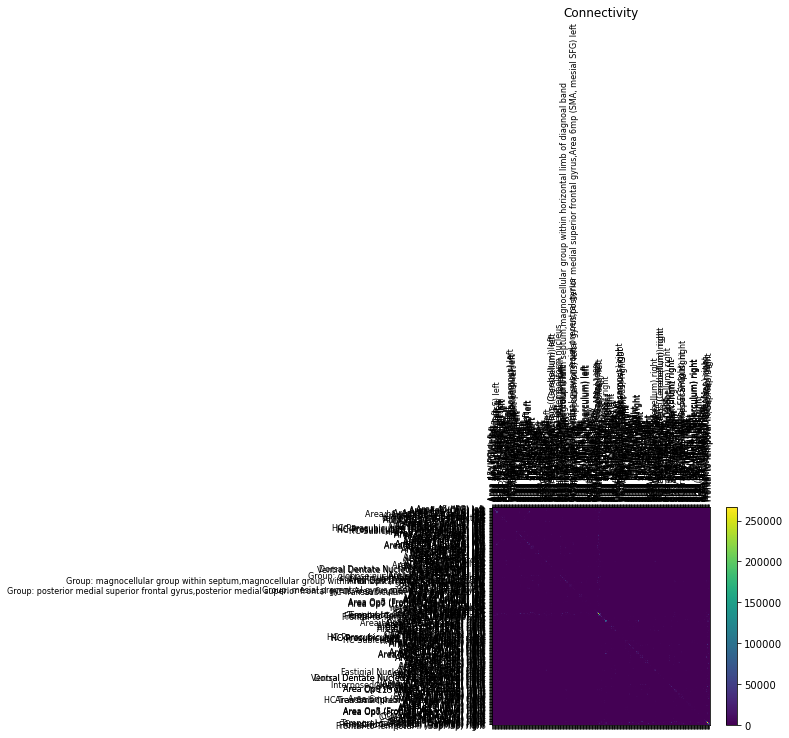

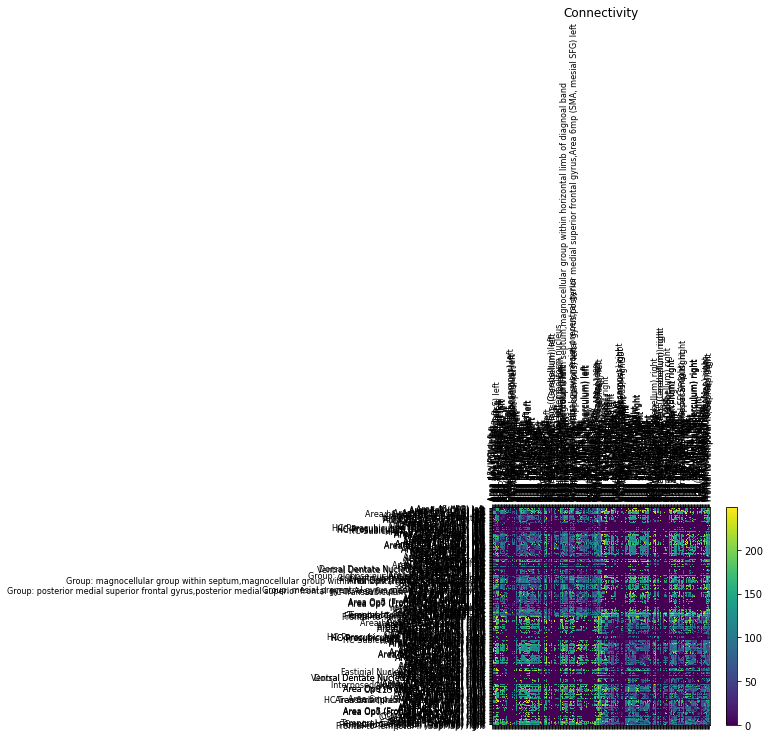

In [16]:
plot_connectivity(connectivity=conn)

In [19]:
# Save connectivity in TVB accepted format
centres_content = np.concatenate((np.array(reg_names)[:, None], positions), axis=1)


root_folder = 'julich_conn'
subject = weights_info['subject']
out_dir = os.path.join(root_folder, subject)
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

np.savetxt(os.path.join(out_dir, "centers.txt"), centres_content, "%s")
np.savetxt(os.path.join(out_dir, "hemispheres.txt"), hemi, "%s")
np.savetxt(os.path.join(out_dir, "weights.txt"), weights_matrix.to_numpy(), "%f")
np.savetxt(os.path.join(out_dir, "tract_lenghts.txt"), tracts_matrix.to_numpy(), "%f")

### Create simulation using the obtained connectivity

In [20]:
sim = simulator.Simulator()
sim.connectivity = conn
sim.simulation_length = 1024
sim.configure()

,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: 4ea31043-fa71-44f2-85e3-d870dedb2281
coupling,Linear gid: d2f73f95-3794-4ae1-ad41-bb1c69bd295d
gid,UUID('d6c3f021-333c-4bfc-9fcb-c178e13b6d44')
initial_conditions,None
integrator,HeunDeterministic gid: 16dfd6f1-ac85-4070-9951-49ed9ecd2f9f
model,Generic2dOscillator gid: a66d1c09-f310-4da6-bb56-a33a09091916
monitors,"(,)"
simulation_length,1024.0


In [21]:
(time, data),  = sim.run()

WARNING  random_state supplied for non-stochastic integration


In [22]:
time.size

1048

In [23]:
data.shape

(1048, 1, 294, 1)

In [24]:
tsr = time_series.TimeSeriesRegion(
    data=data,
    connectivity=sim.connectivity,
    sample_period=sim.monitors[0].period)
tsr.configure()

In [25]:
%matplotlib widget
import tvb.simulator.plot.timeseries_interactive as ts_int
tsi = ts_int.TimeSeriesInteractive(time_series=tsr)
tsi.configure()
tsi.show()

GridBox(children=(Output(layout=Layout(border='solid 1px black', margin='3px 3px 3px 3px', padding='2px 2px 2p…